In [2]:
!dir

 Volume in drive C is OS
 Volume Serial Number is AA23-606F

 Directory of C:\Users\Paul\PycharmProjects\BlogPost

05/22/2019  11:52 AM    <DIR>          .
05/22/2019  11:52 AM    <DIR>          ..
05/20/2019  07:40 PM             1,454 .gitignore
05/22/2019  11:53 AM    <DIR>          .idea
05/21/2019  05:04 PM    <DIR>          .ipynb_checkpoints
05/22/2019  11:52 AM             4,759 BlogPost.ipynb
05/20/2019  07:43 PM    <DIR>          data
05/22/2019  10:18 AM               220 deserts.py
05/22/2019  11:52 AM             7,126 main.py
05/20/2019  07:01 PM             4,930 readme.md
05/21/2019  04:11 PM    <DIR>          __pycache__
               5 File(s)         18,489 bytes
               6 Dir(s)  85,251,981,312 bytes free


In [3]:
%matplotlib inline

In [4]:
%run -i main.py

         Year    Age   Race   Income  Adults  Children  Household Size  \
51336  2015.0  25-29  White     $75+     2.0       0.0             2.0   
51337  2015.0  18-24  Black  $25-35K     1.0       3.0             4.0   
51338  2015.0  18-24  Black  $25-35K     1.0       1.0             2.0   
51339  2015.0  18-24  White  $35-50K     2.0       0.0             2.0   
51340  2015.0  45-49  White     $75+     3.0       1.0             4.0   

       Zip-code  In Food Desert  Unemployed  Active Overweight Pre-Diabetic  \
51336   98908.0           False       False   False      False        False   
51337   98208.0           False       False   False      False        False   
51338   98433.0           False       False   False       True        False   
51339   98122.0           False       False   False       True        False   
51340   98686.0           False       False   False       True        False   

      Diabetic  Good-health  Fruit Daily  Veg Daily  Fruit Weekly  Veg Weekly  \

In [5]:
fruits_n_veg = ['Fruit Daily', 'Veg Daily', 'Fruit Weekly',
                'Veg Weekly', 'Fruit Monthly', 'Veg Monthly']

df17_consumption = df17.melt(id_vars='In Food Desert',
                             value_vars=fruits_n_veg,
                             value_name='Proportion reporting eating...')

df13_consumption = df13.melt(id_vars='In Food Desert',
                             value_vars=fruits_n_veg,
                             value_name='Proportion reporting eating...')

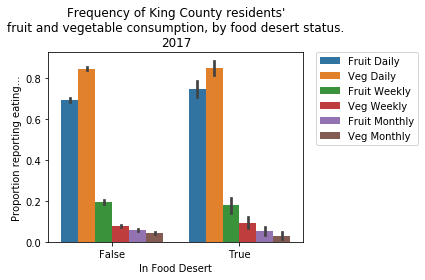

In [7]:
sns.barplot('In Food Desert',
            'Proportion reporting eating...',
            hue='variable',
            data=df17_consumption)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.title('Frequency of King County residents\'\nfruit and vegetable consumption, by food desert status.\n2017')
plt.tight_layout()
plt.show()

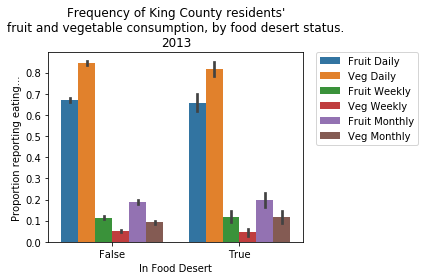

In [8]:
sns.barplot('In Food Desert',
            'Proportion reporting eating...',
            hue='variable',
            data=df13_consumption)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.title('Frequency of King County residents\'\nfruit and vegetable consumption, by food desert status.\n2013')
plt.tight_layout()
plt.show()
